In [2]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import visualisations

%matplotlib inline

In [3]:
meshgrid = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathymetry = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
T_lon = bathymetry.variables['nav_lon'][:]
T_lat = bathymetry.variables['nav_lat'][:]
grid = meshgrid.variables['gdepw_0'][:]
depths = meshgrid.variables['gdept_1d'][:]

In [4]:
plt.rcParams['font.size'] = 17

[258 178]
[344 276]
[388 271]


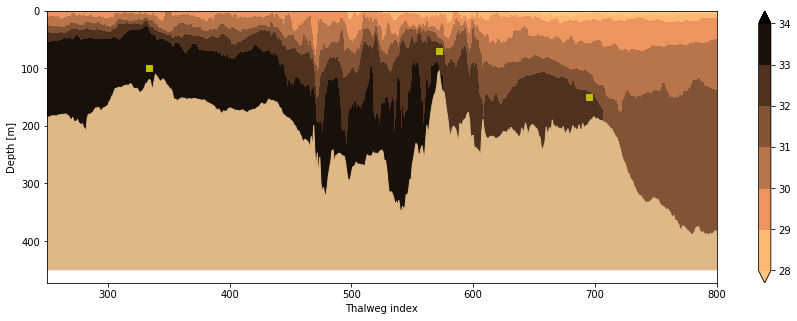

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, clevels=[28, 29, 30, 31, 32, 33, 34], cmap='copper_r',
                              xcoord_distance=False)
ax.set_xlim((250, 800))
ax.plot(334, 100, 'ys')
ax.plot(572, 70, 'ys')
ax.plot(695, 150, 'ys')
print (lines[334])
print (lines[572])
print (lines[695])

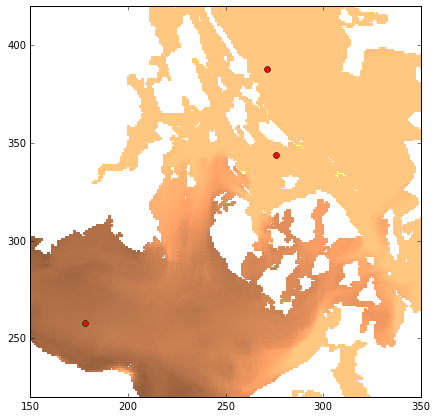

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.pcolormesh(sal2017[0], cmap='copper_r', vmin=28, vmax=34)
ax.set_xlim((150, 350))
ax.set_ylim((220, 420))
ax.plot(lines[334, 1], lines[334, 0], 'ro')
ax.plot(lines[572, 1], lines[572, 0], 'ro')
ax.plot(lines[695, 1], lines[695, 0], 'ro')

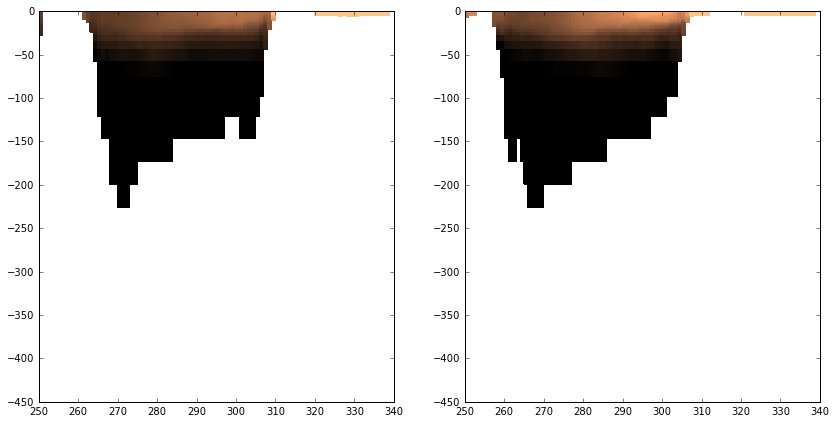

In [97]:
tt = np.arange(250, 340);

XX, ZZ = np.meshgrid(tt,-depths[:])
fig, ax = plt.subplots(1, 2, figsize=(14,7))
mesh = ax[0].pcolormesh(XX, ZZ, sal2017[:, 388, 250:340], cmap='copper_r', vmin=28, vmax=30)
mesh = ax[1].pcolormesh(XX, ZZ, sal2017[:, 395, 250:340], cmap='copper_r', vmin=28, vmax=30)

In [5]:
lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);

XX,ZZ = np.meshgrid(ds,-depths[:])

ValueError: Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cmo.algae, cmo.algae_r, cmo.amp, cmo.amp_r, cmo.balance, cmo.balance_r, cmo.curl, cmo.curl_r, cmo.deep, cmo.deep_r, cmo.delta, cmo.delta_r, cmo.dense, cmo.dense_r, cmo.diff, cmo.diff_r, cmo.gray, cmo.gray_r, cmo.haline, cmo.haline_r, cmo.ice, cmo.ice_r, cmo.matter, cmo.matter_r, cmo.oxy, cmo.oxy_r, cmo.phase, cmo.phase_r, cmo.rain, cmo.rain_r, cmo.solar, cmo.solar_r, cmo.speed, cmo.speed_r, cmo.tarn, cmo.tarn_r, cmo.tempo, cmo.tempo_r, cmo.thermal, cmo.thermal_r, cmo.topo, cmo.topo_r, cmo.turbid, cmo.turbid_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

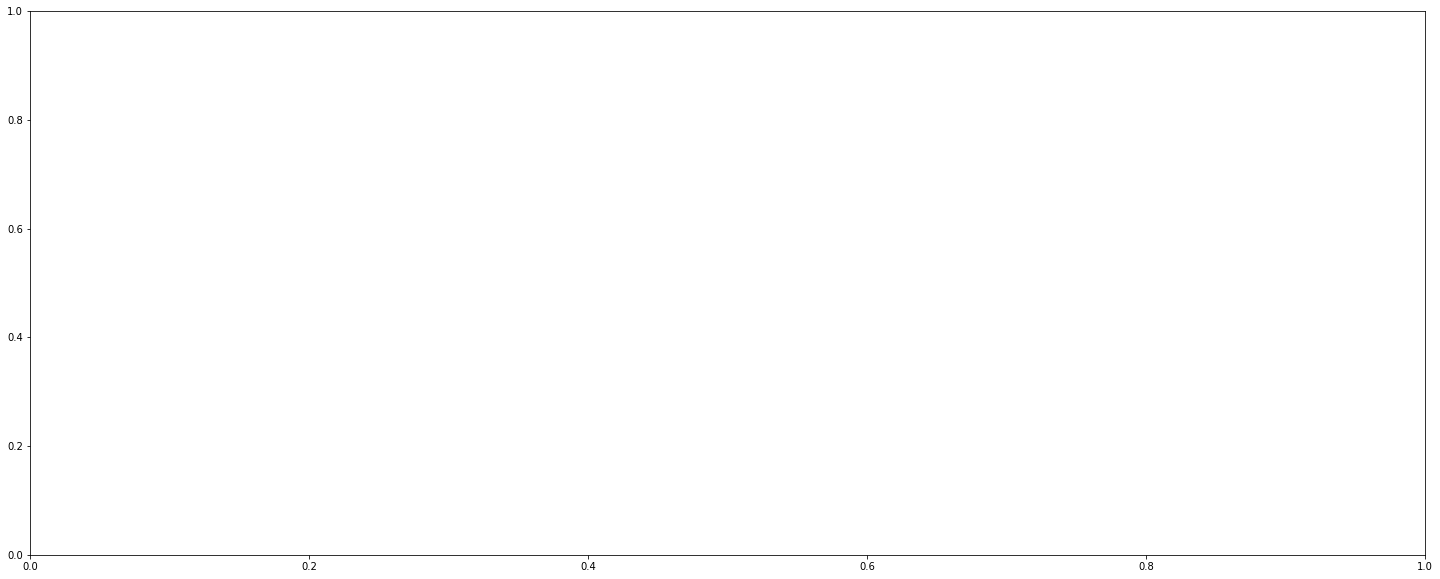

In [7]:
smax, smin = 34, 28
salT=sal2017[:,lines[:,0],lines[:,1]]

plt.figure(figsize=(25,10))
plt.pcolormesh(XX, ZZ, salT[:], vmin=smin, vmax=smax, cmap='spectral')
plt.colorbar()
plt.title('2017')
plt.xlim(200,800)

/ocean/sallen/allen/research/Meopar/tools/SalishSeaTools/salishsea_tools/visualisations.py:225: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


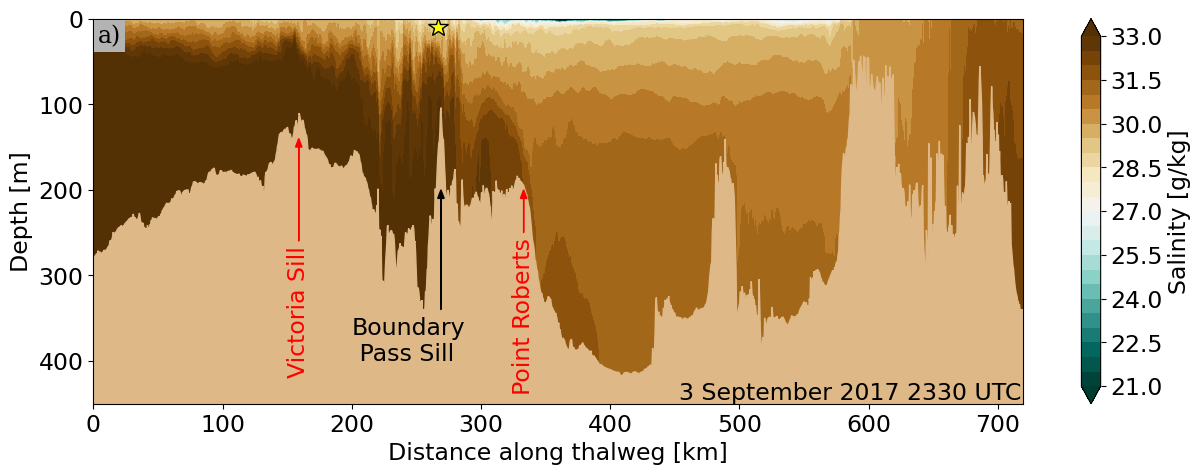

In [15]:
mylabels = ['a)', 'b)', 'c)', 'd)']


#fT2017 = nc.Dataset('/results2/SalishSea/nowcast-green.201806/03sep17/SalishSea_1h_20170903_20170903_grid_T.nc','r')
fT2017 = nc.Dataset('/home/sallen/MEOPAR/estuarine_flux_paper/older_plots/SalishSea_1h_20170903_20170903_grid_T.nc')
sal2017 = fT2017.variables['vosaline'][23,:]
m = sal2017 == 0
sal2017 = np.ma.array(sal2017,mask=m)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, 
                               clevels=[
                                   21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 
                                        27, 27.5, 
                                   28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33], cmap='BrBG_r',
                              xcoord_distance=True)
cbar.set_label(label='Salinity [g/kg]', size=17)

# Timestamp
ax.text(0.63, 0.01, '3 September 2017 2330 UTC', transform=ax.transAxes)

ax.text(0.005, 0.985, mylabels[0], transform=ax.transAxes,
    fontsize=17, verticalalignment='top', fontfamily='serif',
    bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

ax.arrow(159, 260, 0, -110, fc='r', ec='r', head_width=5, head_length=10)
ax.plot(267, 10, '*', color='yellow', markersize=15, markeredgecolor='k')    # the star
ax.arrow(333, 250, 0, -40, fc='r', ec='r', head_width=5, head_length=10)
ax.text(159, 420, 'Victoria Sill', rotation=90, horizontalalignment='center',
        verticalalignment='bottom', color='r')
ax.text(333, 440, 'Point Roberts', rotation=90, horizontalalignment='center',
        verticalalignment='bottom', color='r')

ax.text(200, 400, 'Boundary\n Pass Sill')
ax.arrow(269, 340, 0, -130, fc='k', ec='k', head_width=5, head_length=10)

ax.set_ylim(450, 0)
plt.savefig('allen_thalweg_19aug19_v2.png')
plt.savefig('allen_thalweg_19aug19_v2.pdf')

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


-125.927246094
50.3985328674
-126.167480469
50.4718170166


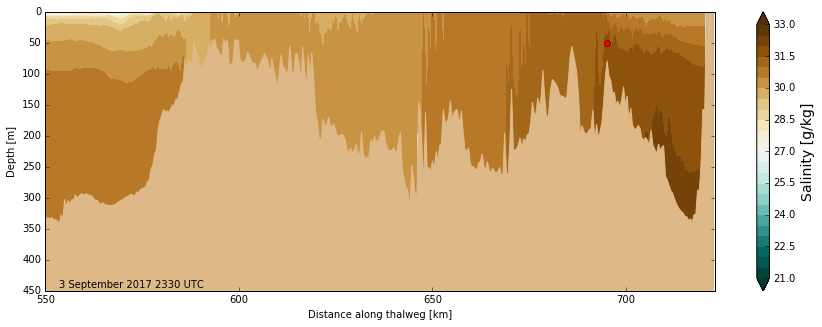

In [64]:
fT2017 = nc.Dataset('/results/SalishSea/nowcast-green/03sep17/SalishSea_1h_20170903_20170903_grid_T.nc','r')
sal2017 = fT2017.variables['vosaline'][23,:]
m = sal2017 == 0
sal2017 = np.ma.array(sal2017,mask=m)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, 
                               clevels=[
                                   21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 
                                        27, 27.5, 
                                   28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33], cmap='BrBG_r',
                              xcoord_distance=True)
cbar.set_label(label='Salinity [g/kg]', size=14)

# Timestamp
ax.text(0.02, 0.01, '3 September 2017 2330 UTC', transform=ax.transAxes)


ax.set_xlim(550, 723)
ax.plot(695, 50, 'ro')

print(T_lon[lines[1480,0],lines[1480,1]])
print(T_lat[lines[1480,0],lines[1480,1]])

print(T_lon[lines[1539,0],lines[1539,1]])
print(T_lat[lines[1539,0],lines[1539,1]])

In [60]:
print(lines.shape)

(1540, 2)


## For EGU

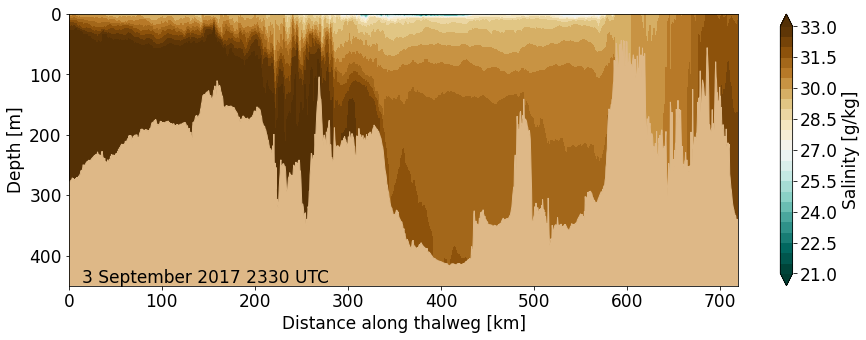

In [6]:
plt.rcParams['font.size'] = 17
fT2017 = nc.Dataset('/results2/SalishSea/nowcast-green.201905/03sep17/SalishSea_1h_20170903_20170903_grid_T.nc','r')
sal2017 = fT2017.variables['vosaline'][23,:]
m = sal2017 == 0
sal2017 = np.ma.array(sal2017, mask=m)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, sal2017, bathymetry, meshgrid, 
                               clevels=[
                                   21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 
                                        27, 27.5, 
                                   28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33], cmap='BrBG_r',
                              xcoord_distance=True)
cbar.set_label(label='Salinity [g/kg]', size=17)

# Timestamp
ax.text(0.02, 0.01, '3 September 2017 2330 UTC', transform=ax.transAxes)


ax.set_ylim(450, 0);
plt.savefig('thalweg_for_EGU.png')